<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/1stWeekTask/Iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification menggunakan metode KNN, terdapat 3 spesies bunga iris, ketika bunga baru diberikan, kita perlu memprediksi spesies dari bunga tersebut**

In [15]:
# Import pustaka yang dibutuhkan untuk pengolahan data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor algoritma K-Nearest Neighbors (KNN) dari scikit-learn

In [16]:
# Membaca file dataset iris dari folder yang ditunjukkan
df = pd.read_csv('sample_data/Iris.csv')

# Menampilkan 5 baris pertama dari dataset untuk memahami struktur data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Menghitung jumlah spesies bunga dalam kolom "Species" untuk mengetahui distribusi spesies
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


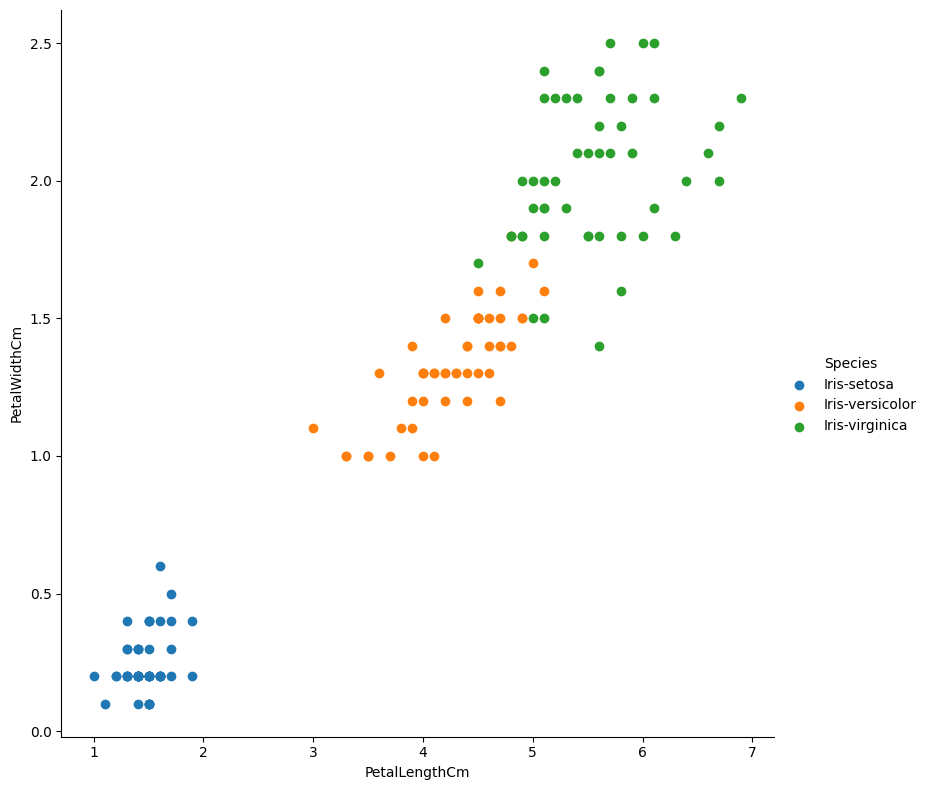

In [18]:
# Membuat plot scatter untuk visualisasi hubungan antara panjang dan lebar petal (kelopak bunga) berdasarkan spesies
sns.FacetGrid(df, hue="Species", height=8).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()


In [19]:
# Membuat mapping nilai numerik untuk setiap spesies agar dapat diproses oleh model KNN
flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df["Species"] = df["Species"].map(flower_mapping)


In [20]:
# Memisahkan fitur (X) dan target (y). Fitur adalah karakteristik bunga, sedangkan target adalah spesies bunga
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

In [21]:
# Membuat model KNN dengan jumlah tetangga (neighbors) sebanyak 3
model = KNeighborsClassifier(n_neighbors=3)

In [22]:
# Melatih model KNN menggunakan data X (fitur) dan y (target)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Memprediksi data yang telah ada untuk mengevaluasi performa model
predicted = model.predict(X)

In [24]:
# Menampilkan akurasi model pada data pelatihan
print(f'Akurasi model: {model.score(X, y)}')

Akurasi model: 0.96


In [25]:
# Menampilkan laporan klasifikasi yang menunjukkan metrik seperti precision, recall, dan F1-score
print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [26]:
# Menampilkan matriks kebingungan (confusion matrix) yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas
print(metrics.confusion_matrix(y, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# **Model yang sudah dilatih diuji untuk melakukan prediksi jenis spesies dari data baru yang ditambahkan**

In [27]:
# Model yang telah dilatih akan digunakan untuk memprediksi spesies dari data baru
new_data = np.array([[5.9, 3.0, 5.1, 1.8]])  # Data baru untuk diprediksi

In [28]:
# Memprediksi spesies dari bunga baru berdasarkan karakteristik yang diberikan
prediksi = model.predict(new_data)

In [29]:
# Menampilkan hasil prediksi (dalam bentuk numerik)
print(f'Prediksi untuk data baru: {prediksi[0]}')

Prediksi untuk data baru: 2


In [30]:
# Mapping nilai numerik hasil prediksi kembali ke nama spesies asli
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [31]:
# Menampilkan nama spesies yang diprediksi
print(f'Spesies yang diprediksi: {species_mapping[prediksi[0]]}')

Spesies yang diprediksi: Iris-virginica
